# Project: Wrangling and Analyze Data

In [1]:
# Import the needed libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, time, json, requests, tweepy
import datetime as dt

import warnings
from IPython.display import Image
from functools import reduce
!pip install jupyterthemes --quiet
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

% matplotlib inline

## Data Gathering 
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Manually download WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
# Upload the downloaded file
# load the file into a pandas DataFrame (dfTwitterArchive)

dfTwitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using the provided url to programmatically download image_predictions.tsv

fileName = 'image-predictions.tsv'
if not os.path.exists(fileName):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)
    with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [4]:
# load the file into a pandas DataFrame (image_predictions shortened as img_preds) then view it

dfImagePredictions = pd.read_csv('image-predictions.tsv', sep = '\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### I used the data that was provided

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#### df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#### change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#### NOTE TO REVIEWER: this student had mobile verification issues so the following
#### Twitter API code was sent to this student from a Udacity instructor
#### Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_twt_arc.tweet_id.values

len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0

fails_dict = {}

start = timer()

#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

print(end - start)

print(fails_dict)


In [5]:
# Read this tweet_json.txt file line by line into a pandas DataFrame (df_tweet_json) 
#with (at minimum) tweet ID, retweet count, and favorite count then view it

#Create a list to gather needed information that wil be used to create the dataframe
ListForDF = []


# Read tweet_json.txt file line by line and extract the needed information
with open('tweet-json.txt', encoding='utf-8') as tweetJson:
    data = json.load(tweetJson)
    for dictionary in data:
        tweetId = dictionary['id']
        url = dictionary['full_text'][dictionary['full_text'].find('https'):]
        favoriteCount = dictionary['favorite_count']
        retweetCount = dictionary['retweet_count']
        followersCount = dictionary['user']['followers_count']
        friendsCount = dictionary['user']['friends_count']
        
        # We only want original ratings (no retweets). There is need to identify the retweets
        retweetedStatus = 'True' if dictionary.get('retweeted_status', 'False') != 'False' else 'False'
        if retweetedStatus == 'True':
            url = 'Retweet'

        ListForDF.append({'tweetId': str(tweetId),
                             'favoriteCount': int(favoriteCount),
                             'retweetCount': int(retweetCount),
                             'followersCount': int(followersCount),
                             'friendsCount': int(friendsCount),
                             'url': url,
                             'retweetedStatus': retweetedStatus,
                            })
    df_tweet_json = pd.DataFrame(ListForDF, columns = ['tweetId', 'favoriteCount','retweetCount', 
                                                           'followersCount', 'friendsCount', 'url',
                                                           'retweetedStatus'])

## Assessing Data

In this section, we will address the following:

 - [Quality Issues](#Quality-Issues)
 - [Tidiness Issues](#Tidiness-Issues)


### Visual Assessment
We will visualy inspect the three datasets we have gathered above.

In [6]:
dfTwitterArchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
dfImagePredictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
df_tweet_json

,tweetId,favoriteCount,retweetCount,followersCount,friendsCount,url,retweetedStatus
0,892420643555336193,39467,8853,3200889,104,https://t.co/MgUWQ76dJU,False
1,892177421306343426,33819,6514,3200889,104,https://t.co/0Xxu71qeIV,False
2,891815181378084864,25461,4328,3200889,104,https://t.co/wUnZnhtVJB,False
3,891689557279858688,42908,8964,3200889,104,https://t.co/tD36da7qLQ,False
4,891327558926688256,41048,9774,3200889,104,https://t.co/AtUZn91f7f,False
5,891087950875897856,20562,3261,3200889,104,https://t.co/kQ04fDDRmh,False
6,890971913173991426,12041,2158,3200889,104,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,False
7,890729181411237888,56848,16716,3200889,104,https://t.co/v0nONBcwxq,False
8,890609185150312448,28226,4429,3200889,104,https://t.co/9TwLuAGH0b,False
9,890240255349198849,32467,7711,3200889,104,https://t.co/t1bfwz5S2A,False


### Programmatic Assessment
We will use pandas' functions and/or methods to assess the data in the three datasets we have gathered above.

In [9]:
dfTwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
dfImagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweetId            2354 non-null object
favoriteCount      2354 non-null int64
retweetCount       2354 non-null int64
followersCount     2354 non-null int64
friendsCount       2354 non-null int64
url                2354 non-null object
retweetedStatus    2354 non-null object
dtypes: int64(4), object(3)
memory usage: 128.8+ KB


In [12]:
all_columns = pd.Series(list(dfTwitterArchive) + list(dfImagePredictions) + list(df_tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [13]:
dfTwitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
dfImagePredictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_tweet_json.describe()

,favoriteCount,retweetCount,followersCount,friendsCount
count,2354.000000,2354.000000,2.354000e+03,2354.0
mean,8080.968564,3164.797366,3.200942e+06,104.0
std,11814.771334,5284.770364,4.457302e+01,0.0
min,0.000000,0.000000,3.200799e+06,104.0
25%,1415.000000,624.500000,3.200898e+06,104.0
50%,3603.500000,1473.500000,3.200945e+06,104.0
75%,10122.250000,3652.000000,3.200953e+06,104.0
max,132810.000000,79515.000000,3.201018e+06,104.0


In [16]:
dfTwitterArchive.duplicated().sum()

0

In [17]:
dfImagePredictions.duplicated().sum()

0

In [18]:
df_tweet_json.duplicated().sum()

0

In [19]:
dfTwitterArchive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
Buddy            7
Toby             7
Daisy            7
an               7
Rusty            6
Scout            6
Bella            6
Jack             6
Oscar            6
Jax              6
Leo              6
Dave             6
Stanley          6
Milo             6
Koda             6
Bentley          5
              ... 
Julio            1
Zara             1
Tycho            1
Scruffers        1
Kellogg          1
Brady            1
Grizzwald        1
Mack             1
Kane             1
Lillie           1
Harvey           1
Toffee           1
Dallas           1
Fiji             1
Florence         1
Schnitzel        1
Kollin           1
Freddery         1
Opie             1
Tonks            1
Eevee            1
Ralpher     

In [20]:
dfTwitterArchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
dfTwitterArchive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
df_tweet_json.retweetedStatus.value_counts()

False    2175
True      179
Name: retweetedStatus, dtype: int64

### Quality-Issues

1. - Tweet_id is an integer not a string (also applies to dfImagePredictions).

2. - Incorrect dog names such as 'a', 'an', 'the', and 'None'.

3. - Abnormally high rating_numerator/rating_denominator ratios.

4. - Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id, timestamp,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

5. - Missing data in columns: retweeted_status_id, in_reply_to_status_id, retweeted_status_timestamp, expanded_urls, retweeted_status_user_id, in_reply_to_user_id.

6. - Dog breeds joined with underscore in p1,p2, and p3.

7. - Inconsistent capitilization for dog breeds in p1,p2, and p3.

8. - Contains retweets.

### Tidiness-Issues
1. - One variable in `dfTwitterArchive` split into four columns (doggo, floofer, pupper, puppo).

2. - Missing breed information

3. - df_tweet_json and dfTwitterArchive form the same observational unit.

## Cleaning Data



1. - [tweet_id is an integer not a string (also applies to dfImagePredictions).](#Issue_1)

2. - [Incorrect dog names such as 'a', 'an', 'the', and 'None'.](#Issue_2)

3. - [Abnormally high rating_numerator/rating_denominator ratios.](#Issue_3)

4. - [Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id, timestamp,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).](#Issue_4)

5. - [Contains retweets](#Issue_5)

6. - [Dog breeds joined with underscore in p1,p2, and p3.](#Issue_6)

7. - [Inconsistent capitilization for dog breeds in p1,p2, and p3.](#Issue_7)

8. - [df_tweet_json_clean contains retweets.](#Issue_8)

9. - [One variable in `dfTwitterArchive` split into four columns (doggo, floofer, pupper, puppo).](#Issue_9)

10. - [Missing breed information](#Issue_10)

11. - [df_tweet_json and dfTwitterArchive form the same observational unit.](#Issue_11)

In [23]:
# Make copies of original pieces of data

dfTwitterArchive_clean = dfTwitterArchive.copy()
dfImagePredictions_clean = dfImagePredictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

##### Issue_1

#### Define:
Convert tweet_id to string datatype

#### Code

In [24]:
dfTwitterArchive_clean.tweet_id = dfTwitterArchive_clean.tweet_id.astype(str)

#### Test

In [25]:
dfTwitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### Issue_2
#### `Archive`: Incorrect dog names such as 'a', 'an', 'the', and 'None'.

#### Define
Drop all incorrect dog names

#### Code

In [26]:
namesToDelete = [a for a in list(dfTwitterArchive_clean.name.value_counts().index) if a[0].islower()]

In [27]:
dfTwitterArchive_clean = dfTwitterArchive_clean.query('name != @namesToDelete')

#### Test

In [28]:
dfTwitterArchive_clean.query('name == @namesToDelete')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue_3
#### `Archive`: Abnormally high rating_numerator/rating_denominator ratios.

#### Define
Drop records with abnormal ratios

#### Code

In [29]:
dfTwitterArchive_clean['rating'] = dfTwitterArchive_clean.rating_numerator / dfTwitterArchive_clean.rating_denominator
dfTwitterArchive_clean = dfTwitterArchive_clean.query('rating < 10')

#### Test

In [30]:
dfTwitterArchive_clean.query('rating > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


#### Issue_4
#### `Archive`: Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id, timestamp,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Define

Convert in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id to string data type. Convert timestamp, retweeted_status_timestamp to datetime data type.

#### Code

In [31]:
# To string
dfTwitterArchive_clean.in_reply_to_status_id = dfTwitterArchive_clean.in_reply_to_status_id.astype(str)
dfTwitterArchive_clean.in_reply_to_user_id = dfTwitterArchive_clean.in_reply_to_user_id.astype(str)
dfTwitterArchive_clean.retweeted_status_id = dfTwitterArchive_clean.retweeted_status_id.astype(str)
dfTwitterArchive_clean.retweeted_status_user_id = dfTwitterArchive_clean.retweeted_status_user_id.astype(str)


# To datetime
dfTwitterArchive_clean.timestamp = pd.to_datetime(dfTwitterArchive_clean.timestamp, format='%Y-%m-%d %H:%M:%S.%f')
dfTwitterArchive_clean.retweeted_status_timestamp = pd.to_datetime(dfTwitterArchive_clean.retweeted_status_timestamp, format='%Y-%m-%d %H:%M:%S.%f')


#### Test

In [32]:
dfTwitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2241 non-null object
in_reply_to_status_id         2241 non-null object
in_reply_to_user_id           2241 non-null object
timestamp                     2241 non-null datetime64[ns]
source                        2241 non-null object
text                          2241 non-null object
retweeted_status_id           2241 non-null object
retweeted_status_user_id      2241 non-null object
retweeted_status_timestamp    176 non-null datetime64[ns]
expanded_urls                 2186 non-null object
rating_numerator              2241 non-null int64
rating_denominator            2241 non-null int64
name                          2241 non-null object
doggo                         2241 non-null object
floofer                       2241 non-null object
pupper                        2241 non-null object
puppo                         2241 non-null object
rating       

#### Issue_5
#### `Archive`: Contains retweets.

#### Define
Drop retweets (all records where retweeted_status_id, in_reply_to_status_id, retweeted_status_user_id, in_reply_to_user_id  are not `"nan"`). We are interested in only original tweets.

#### Code

In [33]:
dfTwitterArchive_clean = dfTwitterArchive_clean.query('retweeted_status_id == "nan"')

#### Test

In [34]:
dfTwitterArchive_clean.query('retweeted_status_id != "nan"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


#### Issue_6
#### `Image Predictions`: Dog breeds joined with underscore in p1,p2, and p3.

#### Define
Replace `'_'` with space in Dog breeds.

#### Code

In [35]:
dfImagePredictions_clean['p1'] = dfImagePredictions_clean['p1'].str.replace('_',' ')
dfImagePredictions_clean['p2'] = dfImagePredictions_clean['p2'].str.replace('_',' ')
dfImagePredictions_clean['p3'] = dfImagePredictions_clean['p3'].str.replace('_',' ')

#### Test

In [36]:
dfImagePredictions_clean[['p1','p2','p3']].sample(6)

,p1,p2,p3
736,fiddler crab,quail,rock crab
10,golden retriever,Tibetan mastiff,Labrador retriever
125,Chihuahua,miniature pinscher,toy terrier
173,Chihuahua,Italian greyhound,pillow
937,Pembroke,basenji,Cardigan
1944,Arabian camel,house finch,cocker spaniel


#### Issue_7
#### `Image Predictions`: Inconsistent capitilization for dog breeds in p1,p2, and p3.

#### Define
Capitalize each word in p1,p2, and p3

#### Code

In [37]:
# use pandas apply function

dfImagePredictions_clean['p1'] = dfImagePredictions_clean['p1'].apply(lambda x: ' '.join(map(str.capitalize,x.split())))
dfImagePredictions_clean['p2'] = dfImagePredictions_clean['p2'].apply(lambda x: ' '.join(map(str.capitalize,x.split())))
dfImagePredictions_clean['p3'] = dfImagePredictions_clean['p3'].apply(lambda x: ' '.join(map(str.capitalize,x.split())))

#### Test

In [38]:
dfImagePredictions_clean[['p1','p2','p3']].sample(6)

,p1,p2,p3
578,Malamute,Border Collie,Collie
216,Italian Greyhound,American Staffordshire Terrier,Whippet
1143,Hand Blower,Chain Mail,Toilet Seat
2061,French Bulldog,Boxer,Staffordshire Bullterrier
1821,Toilet Tissue,Golden Retriever,Bathtub
123,Trombone,Cornet,French Horn


#### Issue_8
#### `Twitter JSON`: df_tweet_json_clean contains retweets.

#### Define
Drop all retweets in df_tweet_json_clean

#### Code

In [39]:
df_tweet_json_clean = df_tweet_json_clean.query('retweetedStatus != "True"')

#### Test

In [40]:
df_tweet_json_clean.query('retweetedStatus == "True"')

,tweetId,favoriteCount,retweetCount,followersCount,friendsCount,url,retweetedStatus


### Tidiness

#### Issue_9
#### One variable in `dfTwitterArchive` split into four columns (doggo, floofer, pupper, puppo).

#### Define
Merge the *doggo*, *floofer*, *pupper*, and *puppo* columns to a *dog_stage* column. Drop columns that are not needed.

#### Code

In [41]:
def concat_columns(dataFrame,columnNames):
    dataFrame = dataFrame.reset_index(drop=True)
    dog_stage = []
    nwRow = ''
    func = lambda x: "".join(map(str,x))
    for row in range(dataFrame.shape[0]):
#         dog_stage.append(str(dataFrame.loc[row,columnNames].apply(lambda x: ''.join(map(str.strip,x)),axis=1).tolist()))
        nwRow = str(dataFrame.loc[[row],columnNames].apply(func,axis=1).tolist()[0])
        dog_stage.append(nwRow)
    return dog_stage

dfTwitterArchive_clean['dog_stage'] = concat_columns(dfTwitterArchive_clean,['doggo','floofer','pupper','puppo'])
dfTwitterArchive_clean['dog_stage'] = dfTwitterArchive_clean['dog_stage'].str.replace('None','')
dfTwitterArchive_clean.dog_stage = dfTwitterArchive_clean.dog_stage.astype('category')
dfTwitterArchive_clean = dfTwitterArchive_clean.drop(['doggo','floofer','pupper','puppo','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

# dfTwitterArchive_clean = pd.melt(dfTwitterArchive_clean, id_vars = list(dfTwitterArchive_clean)[:-4],
#                            value_vars = list(dfTwitterArchive_clean)[-4:], var_name='what', value_name='dog_stage')

#### Test

In [42]:
dfTwitterArchive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
675,789530877013393408,2016-10-21 18:16:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,1.2,
1592,686394059078897668,2016-01-11 03:47:50,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,https://vine.co/v/iMqBebnOvav,12,10,None,1.2,
1730,679854723806179328,2015-12-24 02:42:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,https://twitter.com/dog_rates/status/679854723...,7,10,Bruce,0.7,
1542,689599056876867584,2016-01-20 00:03:21,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,https://twitter.com/dog_rates/status/689599056...,11,10,None,1.1,
2084,670807719151067136,2015-11-29 03:33:17,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",https://twitter.com/dog_rates/status/670807719...,11,10,Andy,1.1,


#### Issue_10
#### Missing breed information.

#### Define
Create a column for dog breed

#### Code

In [43]:
dfImagePredictions_clean['dog_breed'] = 'None'

for i, row in dfImagePredictions_clean.iterrows():

    if row.p1_dog:
        dfImagePredictions_clean.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog:
        dfImagePredictions_clean.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog:
        dfImagePredictions_clean.set_value(i, 'dog_breed', row.p3)
    else:
        dfImagePredictions_clean.set_value(i, 'dog_breed', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


#### Test

In [44]:
dfImagePredictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,Bannister,0.369449,False,Four-poster,0.105307,False,Shoji,0.098767,False,None
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington Terrier,0.286558,True,Toy Poodle,0.235193,True,Lakeland Terrier,0.087951,True,Bedlington Terrier
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,Maze,0.339850,False,Streetcar,0.099688,False,Sundial,0.084808,False,None
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador Retriever,0.244889,True,American Black Bear,0.056994,False,Brown Bear,0.053993,False,Labrador Retriever
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great Pyrenees,0.732043,True,Kuvasz,0.121375,True,Irish Wolfhound,0.049524,True,Great Pyrenees


#### Issue_11
#### df_tweet_json and dfTwitterArchive form the same observational unit.

#### Define
Merge the `df_tweet_json_clean` and `dfImagePredictions_clean` datasets to the `dfTwitterArchive_clean` table, joining on *tweet_id*.

#### Code

In [45]:
# merge all datasets

df_tweet_json_clean.rename(columns={'tweetId':'tweet_id'},inplace=True)
dfImagePredictions_clean.tweet_id = dfImagePredictions_clean.tweet_id.astype(str)
dfTwitterArchive_clean = pd.merge(dfTwitterArchive_clean, df_tweet_json_clean,
                            on='tweet_id', how='outer')
dfTwitterArchive_clean = pd.merge(dfTwitterArchive_clean, dfImagePredictions_clean,
                            on='tweet_id', how='outer')

#### Test

In [46]:
dfTwitterArchive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
1118,705239209544720384,2016-03-03 03:51:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,https://twitter.com/dog_rates/status/705239209...,11.0,10.0,Jimothy,1.1,,...,Chihuahua,0.157950,True,Toy Terrier,0.089920,True,Mexican Hairless,0.063225,True,Chihuahua
901,733822306246479872,2016-05-21 00:50:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10.0,10.0,Moose,1.0,floofer,...,Lhasa,0.457356,True,Shih-tzu,0.371282,True,Tibetan Terrier,0.048359,True,Lhasa
834,744971049620602880,2016-06-20 19:11:53,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Indie and Jupiter. They're having...,https://twitter.com/dog_rates/status/744971049...,12.0,10.0,Indie,1.2,,...,Toy Poodle,0.497755,True,Golden Retriever,0.282017,True,Miniature Poodle,0.090032,True,Toy Poodle
684,762471784394268675,2016-08-08 02:13:34,"<a href=""http://twitter.com/download/iphone"" r...",Meet Glenn. Being in public scares him. Fright...,https://twitter.com/dog_rates/status/762471784...,12.0,10.0,Glenn,1.2,,...,Samoyed,0.540276,True,Standard Poodle,0.279802,True,Toy Poodle,0.102058,True,Samoyed
213,844223788422217728,2017-03-21 16:26:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Margo. She just dug pup a massive hole...,https://twitter.com/dog_rates/status/844223788...,12.0,10.0,Margo,1.2,,...,Labrador Retriever,0.719510,True,Chesapeake Bay Retriever,0.122019,True,Newfoundland,0.038828,True,Labrador Retriever


In [47]:
dfTwitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 28 columns):
tweet_id              2256 non-null object
timestamp             2065 non-null datetime64[ns]
source                2065 non-null object
text                  2065 non-null object
expanded_urls         2011 non-null object
rating_numerator      2065 non-null float64
rating_denominator    2065 non-null float64
name                  2065 non-null object
rating                2065 non-null float64
dog_stage             2065 non-null category
favoriteCount         2175 non-null float64
retweetCount          2175 non-null float64
followersCount        2175 non-null float64
friendsCount          2175 non-null float64
url                   2175 non-null object
retweetedStatus       2175 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog        

In [48]:
dfTwitterArchive_clean.retweetedStatus.value_counts()

False    2175
Name: retweetedStatus, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
# Code to save dfTwitterArchive_clean to twitter_archive_master.csv

dfTwitterArchive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data


### Insights:
1. Correlation between tweet Retweet Count, Favorite Count and Ratings

2. Scatter plot of strongest pair gotten from the previous insight

3. Top 10 dog breeds

### Retweet Count, Favorite Count and Ratings

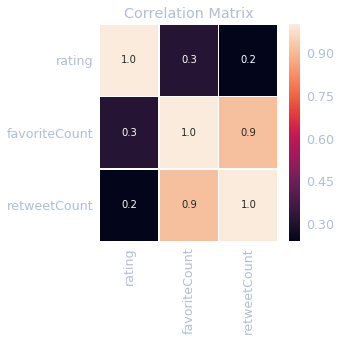

In [50]:
# show the correlation for Retweet Count, Favorite Count and Ratings to check the existing relationship using a heatmap

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(dfTwitterArchive_clean[['rating', 'favoriteCount', 'retweetCount']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

 - From the heat map above, it can be seen that the strongest relationship exists between favorite and retweet counts.
 - Dog posts get more favorite counts than retweets

### Retweet Count `vs.` Favorite Count

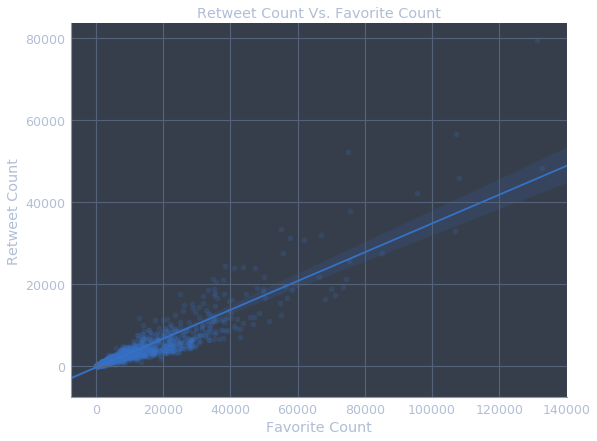

In [51]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="favoriteCount", 
           y="retweetCount", 
           data=dfTwitterArchive_clean,
           size = 6,
           aspect=1.4,
           scatter_kws={'alpha':1/5});

plt.title('Retweet Count Vs. Favorite Count');
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');

These features have a positive correlation

### Top 10 dog breeds

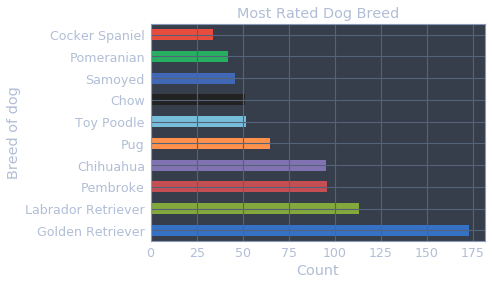

In [52]:
dog_breed = dfTwitterArchive_clean.query('dog_breed != "None"').groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts()[0:10].plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

### Visualization

 - Tweet counts trend over time

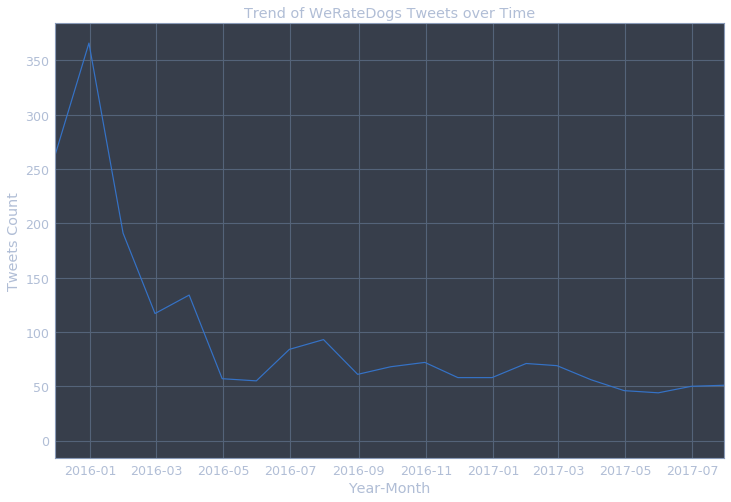

In [53]:

monthly_tweets = dfTwitterArchive_clean.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

plt.figure(figsize=(12, 8))
plt.xlim([dt.date(2015, 11, 30), dt.date(2017, 7, 30)]) 

plt.xlabel('Year-Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('Trend of WeRateDogs Tweets over Time');